In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import zipfile #for unzipping

In [2]:
import os

# Path to the Kaggle input directory where your dataset is located
data_path1 = '/kaggle/input/plant-disease-recognition-dataset'
data_path2 = '/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset'

# List the classes or folders inside each dataset directory
classes1 = os.listdir(data_path1)
classes2 = os.listdir(data_path2)

# Combine class lists (if needed)
all_classes = list(set(classes1 + classes2))  # Use set to remove duplicates if any

# Print the classes to get an idea of the dataset's structure
print(all_classes)


['Train', 'Validation', 'Test']


**Step 1:** ***Data preview***

In [3]:
import os

# Define the paths for Train, Test, and Validation sets
dataset_path = '/kaggle/input/plant-disease-recognition-dataset/'

train_path = os.path.join(dataset_path, 'Train/Train')
test_path = os.path.join(dataset_path, 'Test/Test')
validation_path = os.path.join(dataset_path, 'Validation/Validation')

# Categories in the dataset (Healthy, Rust, Powdery)
categories = ['Healthy', 'Powdery', 'Rust']

# Function to check and print the number of images in each category for Train, Test, and Validation
def check_image_counts(path, categories):
    for category in categories:
        category_path = os.path.join(path, category)
        num_images = len(os.listdir(category_path))
        print(f"{category} images in {path}: {num_images}")

print("Checking Train set:")
check_image_counts(train_path, categories)

print("\nChecking Test set:")
check_image_counts(test_path, categories)

print("\nChecking Validation set:")
check_image_counts(validation_path, categories)


Checking Train set:
Healthy images in /kaggle/input/plant-disease-recognition-dataset/Train/Train: 458
Powdery images in /kaggle/input/plant-disease-recognition-dataset/Train/Train: 430
Rust images in /kaggle/input/plant-disease-recognition-dataset/Train/Train: 434

Checking Test set:
Healthy images in /kaggle/input/plant-disease-recognition-dataset/Test/Test: 50
Powdery images in /kaggle/input/plant-disease-recognition-dataset/Test/Test: 50
Rust images in /kaggle/input/plant-disease-recognition-dataset/Test/Test: 50

Checking Validation set:
Healthy images in /kaggle/input/plant-disease-recognition-dataset/Validation/Validation: 20
Powdery images in /kaggle/input/plant-disease-recognition-dataset/Validation/Validation: 20
Rust images in /kaggle/input/plant-disease-recognition-dataset/Validation/Validation: 20


In [4]:
import os

# Define the paths for Train, Test, and Validation sets for Dataset 2
dataset_path_2 = '/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/'

train_path_2 = os.path.join(dataset_path_2, 'Train')
test_path_2 = os.path.join(dataset_path_2, 'Test')
validation_path_2 = os.path.join(dataset_path_2, 'Validation')

# Function to check and print the number of images in each category for Train, Test, and Validation
def check_image_counts(path, categories):
    for category in categories:
        category_path = os.path.join(path, category)
        num_images = len(os.listdir(category_path))
        print(f"{category} images in {path}: {num_images}")

print("Checking Dataset 2 - Train set:")
check_image_counts(train_path_2, categories)

print("\nChecking Dataset 2 - Test set:")
check_image_counts(test_path_2, categories)

print("\nChecking Dataset 2 - Validation set:")
check_image_counts(validation_path_2, categories)


Checking Dataset 2 - Train set:
Healthy images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Train: 94
Powdery images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Train: 92
Rust images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Train: 121

Checking Dataset 2 - Test set:
Healthy images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Test: 36
Powdery images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Test: 71
Rust images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Test: 68

Checking Dataset 2 - Validation set:
Healthy images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Validation: 19
Powdery images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Validation: 6
Rust images in /kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Validation: 63


**Step 2: *Data Understanding***


Displaying sample images from Dataset 1 Training Set:



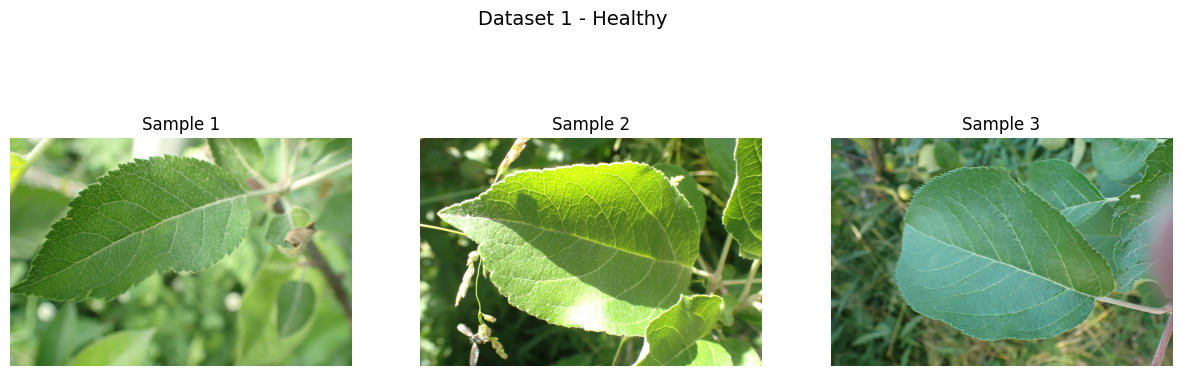

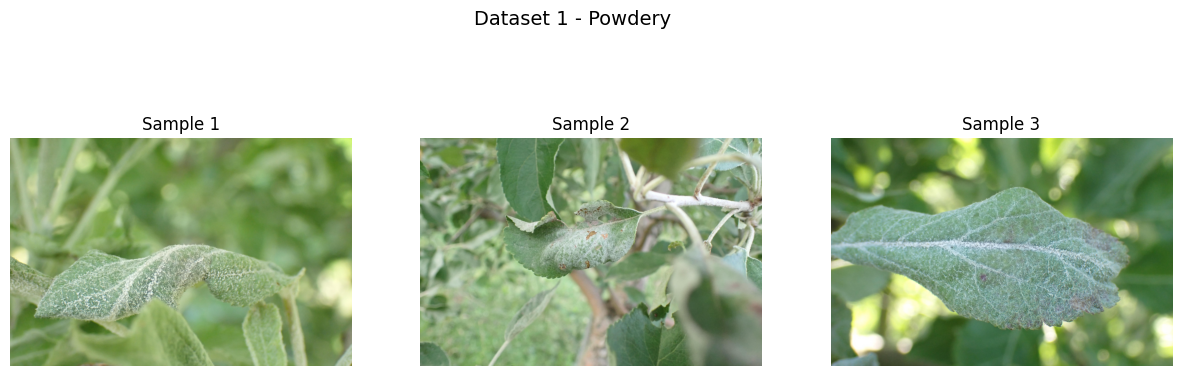

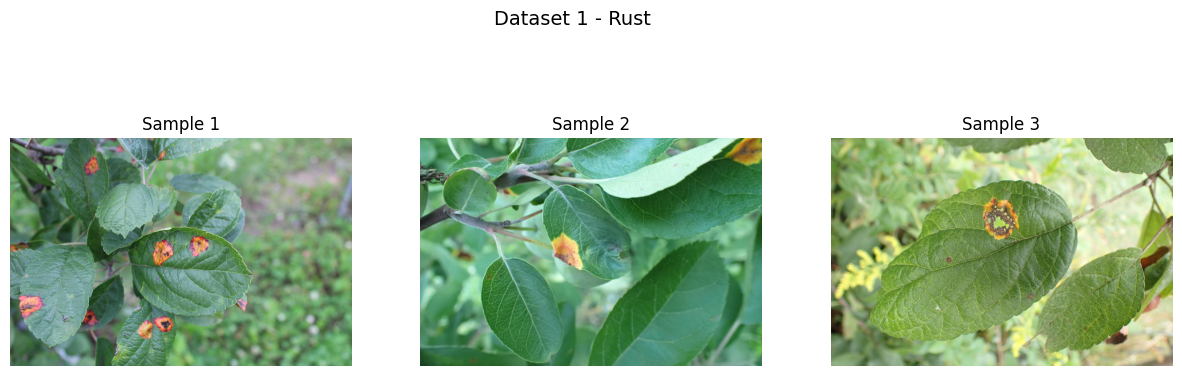


Displaying sample images from Dataset 2 Training Set:



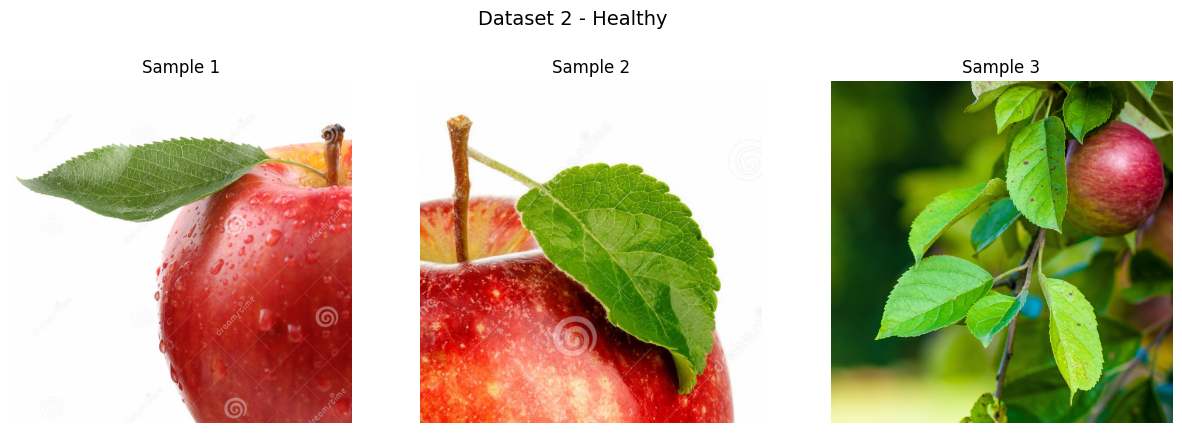

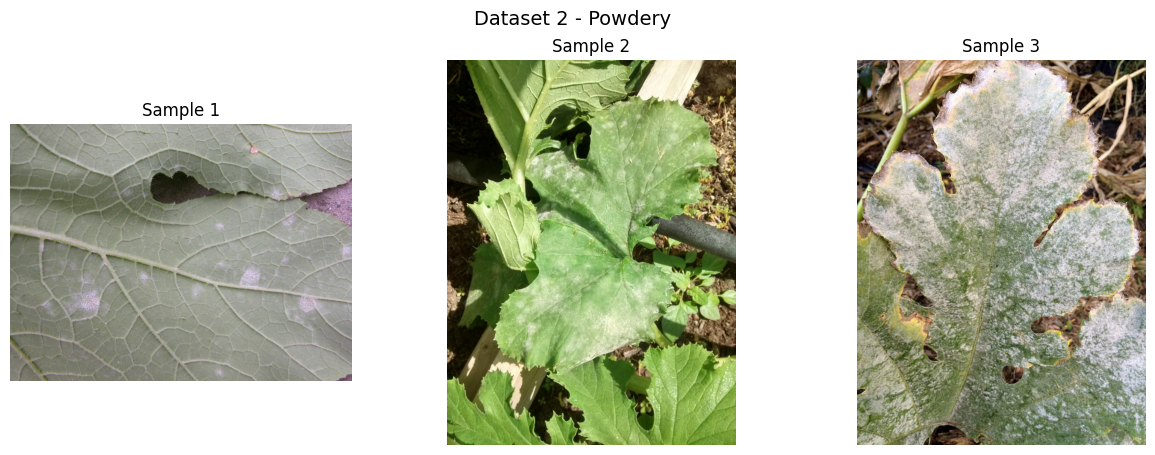

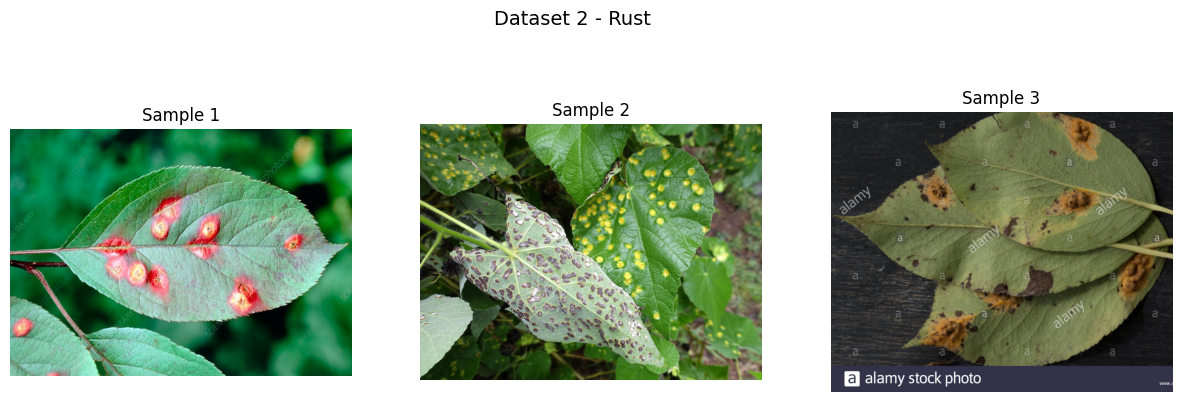

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Define dataset paths (updated paths)
dataset_paths = {
    "Dataset 1": "/kaggle/input/plant-disease-recognition-dataset/Train/Train",
    "Dataset 2": "/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/Train"
}

# Categories in the dataset (Healthy, Rust, Powdery)
categories = ['Healthy', 'Powdery', 'Rust']

# Function to display sample images from each category
def display_sample_images(dataset_name, path, category, num_images=3):
    category_path = os.path.join(path, category)
    
    if not os.path.exists(category_path):  # Ensure category exists
        print(f"Warning: {category_path} not found in {dataset_name}!")
        return
    
    images = os.listdir(category_path)
    
    if len(images) < num_images:  # Ensure enough images are available
        print(f"Warning: Not enough images in {category_path} for sampling!")
        num_images = len(images)  # Adjust to available images
    
    sample_images = random.sample(images, num_images) if images else []
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(f"{dataset_name} - {category}", fontsize=14)
    
    for i, image_file in enumerate(sample_images):
        img = Image.open(os.path.join(category_path, image_file))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Sample {i+1}")
    
    plt.show()

# Iterate through both datasets and display sample images for each category
for dataset_name, train_path in dataset_paths.items():
    print(f"\nDisplaying sample images from {dataset_name} Training Set:\n")
    for category in categories:
        display_sample_images(dataset_name, train_path, category)


**Step 3: *Data Cleaning***

In [6]:
from PIL import Image
import os

# Define dataset paths (including train, test, and validation)
dataset_paths = {
    "Dataset 1": "/kaggle/input/plant-disease-recognition-dataset/",
    "Dataset 2": "/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/"
}

# Define the subdirectories for each dataset (specific paths for each dataset)
data_types_1 = ["Train/Train", "Test/Test", "Validation/Validation"]  # Dataset 1 structure
data_types_2 = ["Train", "Test", "Validation"]  # Dataset 2 structure

# Categories in the dataset (Healthy, Powdery, Rust)
categories = ['Healthy', 'Powdery', 'Rust']

# Function to check for corrupted images
def check_corrupted_images(dataset_name, path, categories, data_type):
    corrupted_images = []
    for category in categories:
        # Handling dataset 1 (nested "Train/Train", "Test/Test", etc.)
        if dataset_name == "Dataset 1":
            category_path = os.path.join(path, data_type, category)  # For Dataset 1
        # Handling dataset 2 (non-nested "Train", "Test", "Validation")
        elif dataset_name == "Dataset 2":
            category_path = os.path.join(path, data_type, category)  # For Dataset 2
        
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} not found in {dataset_name}!")
            continue
        
        for image_name in os.listdir(category_path):
            img_path = os.path.join(category_path, image_name)
            
            try:
                img = Image.open(img_path)  # Try to open the image
                img.verify()  # Verify the image file
            except (IOError, SyntaxError) as e:
                corrupted_images.append(img_path)  # If error occurs, add to list

    # Print results
    if corrupted_images:
        print(f"\nCorrupted images found in {dataset_name}: {len(corrupted_images)}")
        for img_path in corrupted_images:
            print(f"  Corrupted image: {img_path}")
    else:
        print(f"\nNo corrupted images found in {dataset_name}.")

# Iterate over datasets and check for corrupted images in Train, Test, and Validation sets
for dataset_name, dataset_path in dataset_paths.items():
    print(f"\nChecking for corrupted images in {dataset_name}:")
    if dataset_name == "Dataset 1":
        # Dataset 1 has nested "Train/Train", "Test/Test", etc.
        data_types = data_types_1
    else:
        # Dataset 2 has flat "Train", "Test", "Validation"
        data_types = data_types_2
        
    for data_type in data_types:
        print(f"\nChecking {data_type} set:")
        check_corrupted_images(dataset_name, dataset_path, categories, data_type)



Checking for corrupted images in Dataset 1:

Checking Train/Train set:

No corrupted images found in Dataset 1.

Checking Test/Test set:

No corrupted images found in Dataset 1.

Checking Validation/Validation set:

No corrupted images found in Dataset 1.

Checking for corrupted images in Dataset 2:

Checking Train set:

No corrupted images found in Dataset 2.

Checking Test set:

No corrupted images found in Dataset 2.

Checking Validation set:

No corrupted images found in Dataset 2.


**Step 4: *Data Visualization***


Visualizing data for Dataset 1:


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


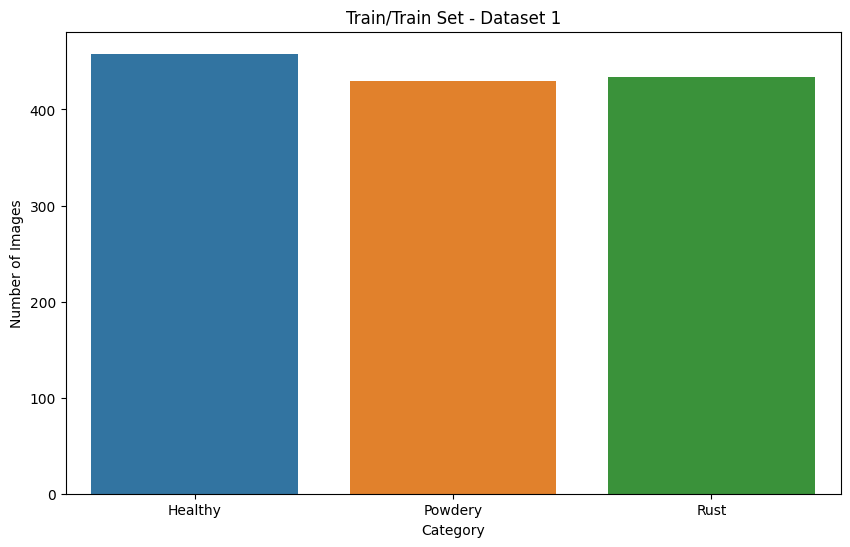

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


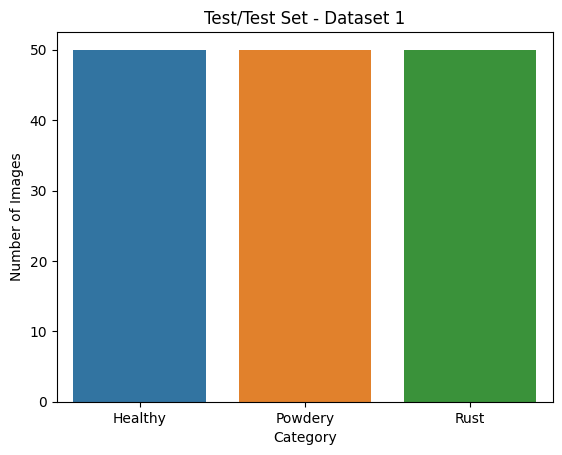

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


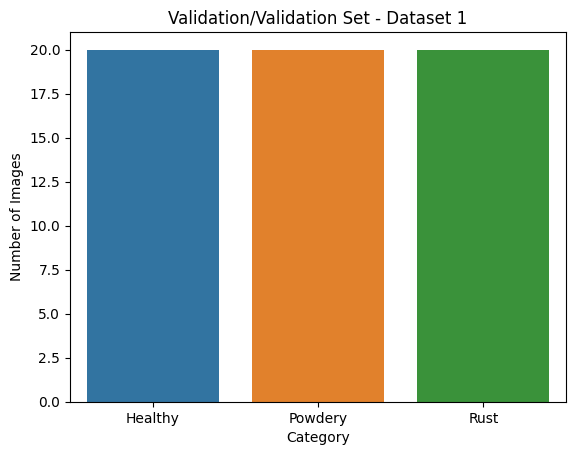

Displaying sample images from Dataset 1 Train set:


<Figure size 1200x1200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)



Visualizing data for Dataset 2:


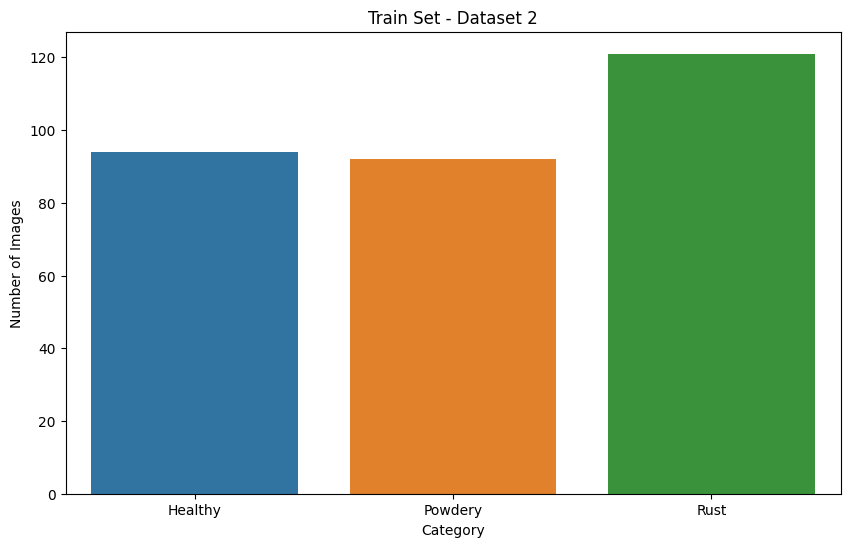

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


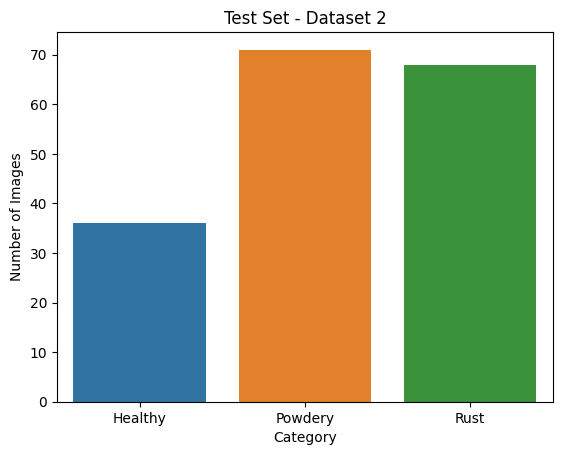

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


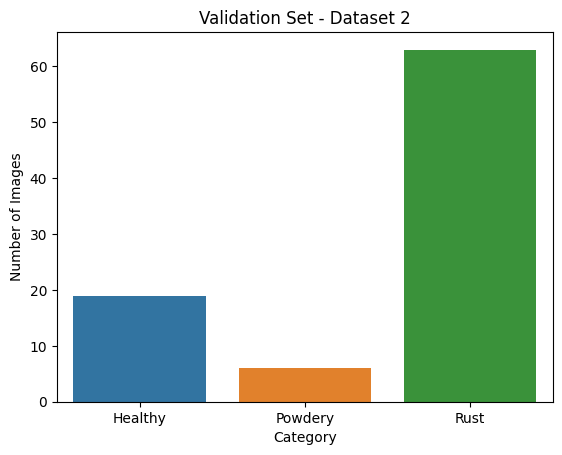

Displaying sample images from Dataset 2 Train set:


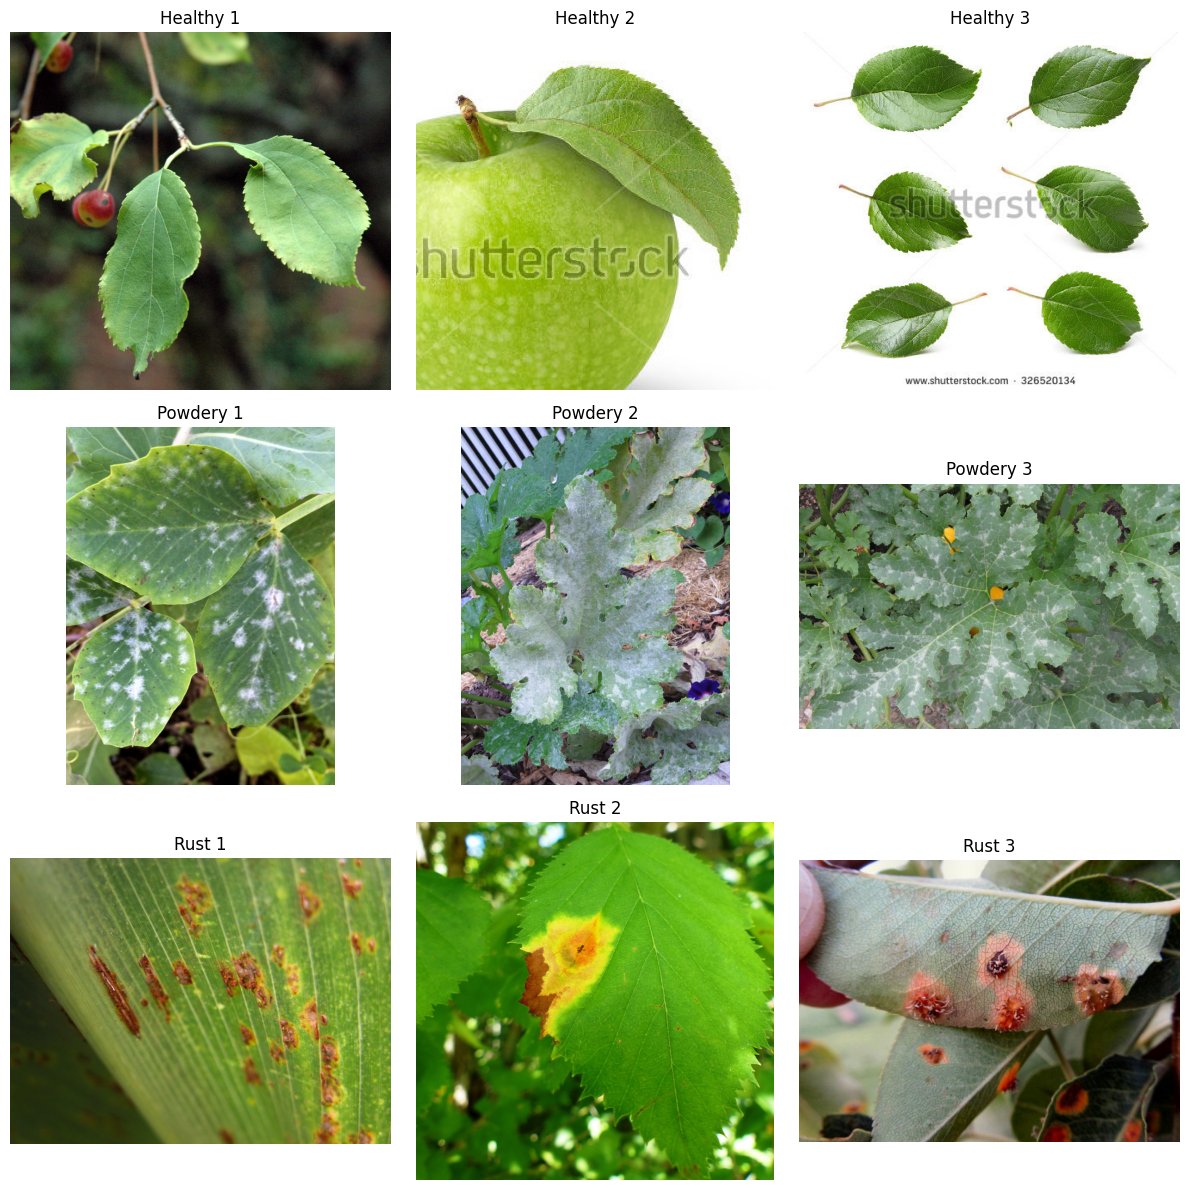

In [7]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define dataset paths (including train, test, and validation)
dataset_paths = {
    "Dataset 1": "/kaggle/input/plant-disease-recognition-dataset/",
    "Dataset 2": "/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/"
}

# Define the subdirectories for each dataset (specific paths for each dataset)
data_types_1 = ["Train/Train", "Test/Test", "Validation/Validation"]  # Dataset 1 structure
data_types_2 = ["Train", "Test", "Validation"]  # Dataset 2 structure

# Categories in the dataset (Healthy, Powdery, Rust)
categories = ['Healthy', 'Powdery', 'Rust']

# Function to get the count of images in each category
def get_category_counts(dataset_name, path, categories, data_type):
    counts = {category: 0 for category in categories}
    for category in categories:
        # Handling dataset 1 (nested "Train/Train", "Test/Test", etc.)
        if dataset_name == "Dataset 1":
            category_path = os.path.join(path, data_type, category)
        # Handling dataset 2 (non-nested "Train", "Test", "Validation")
        elif dataset_name == "Dataset 2":
            category_path = os.path.join(path, data_type, category)
        
        if os.path.exists(category_path):
            counts[category] = len(os.listdir(category_path))
    return counts

# Function to display sample images from each category
def display_sample_images(dataset_name, path, categories, data_type):
    plt.figure(figsize=(12, 12))
    for idx, category in enumerate(categories):
        # Handling dataset 1 (nested "Train/Train", "Test/Test", etc.)
        if dataset_name == "Dataset 1":
            category_path = os.path.join(path, data_type, category)
        # Handling dataset 2 (non-nested "Train", "Test", "Validation")
        elif dataset_name == "Dataset 2":
            category_path = os.path.join(path, data_type, category)
        
        if os.path.exists(category_path):
            image_list = os.listdir(category_path)
            sample_images = random.sample(image_list, 3)  # Show 3 random images from each category
            
            for i, img_name in enumerate(sample_images):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path)
                plt.subplot(len(categories), 3, idx * 3 + i + 1)
                plt.imshow(img)
                plt.title(f"{category} {i+1}")
                plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Iterate over datasets and visualize the data
for dataset_name, dataset_path in dataset_paths.items():
    print(f"\nVisualizing data for {dataset_name}:")

    # 1. Image Count per Category (Train, Test, Validation)
    plt.figure(figsize=(10, 6))
    for data_type in (data_types_1 if dataset_name == "Dataset 1" else data_types_2):
        counts = get_category_counts(dataset_name, dataset_path, categories, data_type)
        sns.barplot(x=list(counts.keys()), y=list(counts.values()))
        plt.title(f"{data_type} Set - {dataset_name}")
        plt.xlabel("Category")
        plt.ylabel("Number of Images")
        plt.show()

    # 2. Display Sample Images from each category in the Train set
    print(f"Displaying sample images from {dataset_name} Train set:")
    display_sample_images(dataset_name, dataset_path, categories, "Train")


**Step 5: *Data Augmentation***


Performing data augmentation for Dataset 1:


<Figure size 1200x1200 with 0 Axes>


Performing data augmentation for Dataset 2:


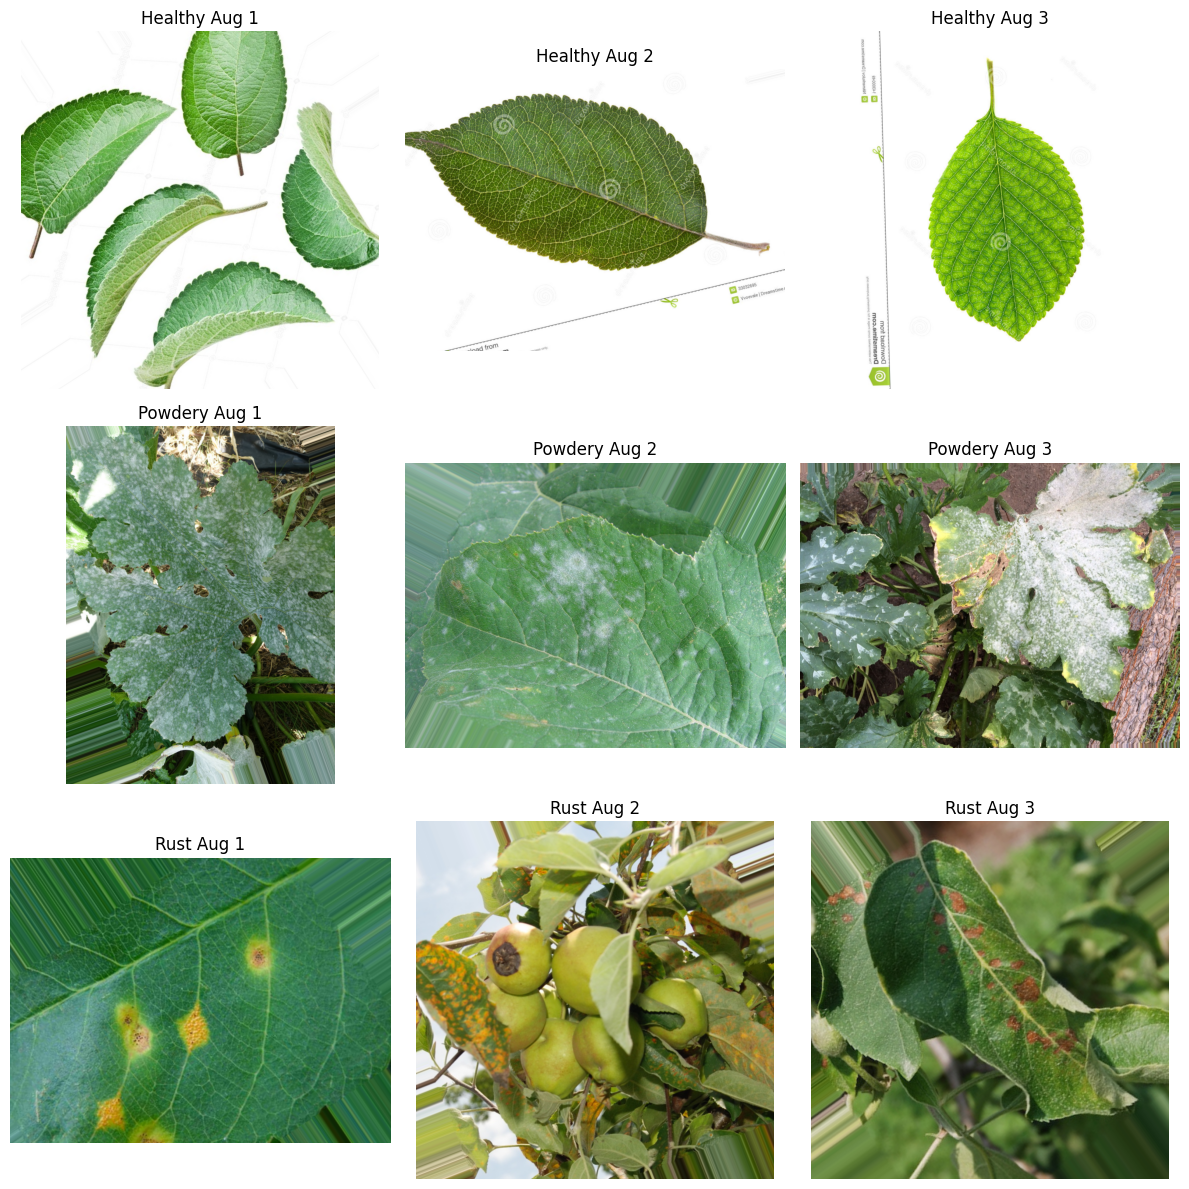

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Define dataset paths (Train)
dataset_paths = {
    "Dataset 1": "/kaggle/input/plant-disease-recognition-dataset/",
    "Dataset 2": "/kaggle/input/plant-leaf-disease-dataset/Plant disease dataset/"
}

# Categories in the dataset (Healthy, Powdery, Rust)
categories = ['Healthy', 'Powdery', 'Rust']

# Augmentation settings using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,   # Random rotation up to 40 degrees
    horizontal_flip=True # Random horizontal flip
)

# Function to augment and display images
def augment_and_display_images(dataset_name, path, categories, data_type, num_images=3):
    plt.figure(figsize=(12, 12))
    
    for idx, category in enumerate(categories):
        # Get category path for Dataset 1 and Dataset 2
        category_path = os.path.join(path, data_type, category) if dataset_name == "Dataset 1" else os.path.join(path, data_type, category)
        
        if os.path.exists(category_path):
            image_list = os.listdir(category_path)
            sample_images = random.sample(image_list, num_images)  # Select 3 random images

            for i, img_name in enumerate(sample_images):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path)
                img_array = img_to_array(img)  # Convert image to array

                # Reshape image for ImageDataGenerator (expects 4D tensor: (1, height, width, channels))
                img_array = img_array.reshape((1,) + img_array.shape)

                # Generate augmented images and display
                for j, batch in enumerate(datagen.flow(img_array, batch_size=1, save_to_dir='/tmp', save_prefix='aug', save_format='jpeg')):
                    augmented_img = batch[0].astype('uint8')  # Convert to uint8 for display
                    plt.subplot(len(categories), num_images, idx * num_images + i + 1)
                    plt.imshow(augmented_img)
                    plt.title(f"{category} Aug {i+1}")
                    plt.axis('off')
                    if j >= 2:  # Stop after 3 augmented images
                        break
    
    plt.tight_layout()
    plt.show()

# Apply data augmentation and display augmented images
for dataset_name, dataset_path in dataset_paths.items():
    print(f"\nPerforming data augmentation for {dataset_name}:")
    augment_and_display_images(dataset_name, dataset_path, categories, "Train")


### Data Insights (Summary, Results, Findings)

After working with the dataset, I gained some valuable insights that will guide the next steps in the project. Here's a summary of the findings:

#### 1. **Dataset Summary**:
   - The dataset consists of three categories: **Healthy**, **Powdery**, and **Rust**. These represent different plant leaf diseases, and I plan to add more disease categories in the future to improve the model's versatility.
   - The data is divided into **Train**, **Test**, and **Validation** sets, ensuring that I have separate data for training the model, evaluating its performance, and validating its predictions.

#### 2. **Data Quality**:
   - I checked the dataset for any corrupted images, and luckily, there were no issues found in the `Train`, `Test`, and `Validation` sets. This means the images are all good to go for model training.
   - I also had to adjust for structural differences between the two datasets I used. Dataset 1 had a nested folder structure (e.g., `Train/Train`), while Dataset 2 had a simpler structure. I handled these differences in the code to ensure smooth image loading.

#### 3. **Data Augmentation**:
   - To help the model generalize better, I applied basic **image augmentations** to the training images, such as:
     - **Rotation** (up to 40 degrees)
     - **Horizontal Flip**
   - The idea behind this is to increase the variability in the training data so that the model can learn to recognize plant diseases under different conditions, improving its ability to handle real-world scenarios.

#### 4. **Data Visualization**:
   - I visualized some augmented images to see how the transformations (rotation and flipping) look. These augmentations add variety to the data, which is crucial for training a robust model.
   - This step is useful for understanding how data augmentation affects the images and ensures that the model won't overfit to specific image patterns.

#### 5. **Insights from Augmented Data**:
   - **Increased Variety**: The augmentation allows the model to see different versions of the same images, helping it learn to recognize key features of the disease rather than memorizing the image.
   - **Better Generalization**: By showing the model rotated and flipped versions of the images, I’m helping it generalize better to new, unseen images, which is especially important when working with real-world data.
   - **Balancing Data**: If some categories (like Rust or Powdery) have fewer images, augmentation helps create a more balanced dataset for training, ensuring that the model doesn't favor one category over another.

#### 6. **Potential Challenges**:
   - **Class Imbalance**: If certain categories have fewer images, the model could become biased toward the overrepresented classes. While augmentation helps, I will need to keep an eye on this during training and may consider additional techniques like class weighting.
   - **Over-augmentation**: It’s important not to overdo it with augmentation (e.g., excessive rotations), as it could distort the images too much and make them unrealistic for real-world predictions. I’ll have to monitor this carefully.

### Key Takeaways:
- **Clean Dataset**: The dataset is ready for training, and I’ve ensured that there are no corrupted images.
- **Increased Data Variability**: Augmentation has successfully created more diverse training images, which should help improve the model's performance.
- **Balanced Representation**: I’ve made sure that the data augmentation helps address potential class imbalance, though this will need monitoring during model training.

### Next Steps:
- **Model Training**: I’ll proceed with training a model using the augmented data, and I’ll validate its performance on the test and validation sets to see how well it generalizes.
- **Adding More Diseases**: As part of future improvements, I plan to add other types of plant diseases to the dataset, expanding the model's capabilities to recognize more conditions.
- **Further Monitoring**: I’ll continue to keep an eye on class balance and might adjust the model or augmentations as needed to improve performance.

